# Trabalho de Deep Learning - FIAP - Professor Felipe Teodoro

## Alunos

RM 340544 - Mauricio Raghe Binda <br>
RM 341704 - Ricardo da Silva Cruz <br>
RM 340347 - Rodrigo de Miranda Videira  <br>

___

## Exercício 7 - 1

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
import random
import cv2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
import zipfile

In [3]:
with zipfile.ZipFile('datasets/fruits.zip', 'r') as zip_ref:
    zip_ref.extractall('datasets/fruits')

In [4]:
train_datagen = ImageDataGenerator(validation_split=0.20)
train_generator = train_datagen.flow_from_directory(
    'datasets/fruits/fruits-360_dataset/fruits-360/Training',
    batch_size=30,
    color_mode = 'rgb',
    subset='training',
    target_size=(100, 100))

Found 48431 images belonging to 120 classes.


In [5]:
valid_generator = train_datagen.flow_from_directory(
    'datasets/fruits/fruits-360_dataset/fruits-360/Training',
    batch_size=30,
    color_mode = 'rgb',
    subset='validation',
    target_size=(100, 100))

Found 12067 images belonging to 120 classes.


In [6]:
x,y = train_generator.next()

In [7]:
x.shape

(30, 100, 100, 3)

In [8]:
num_classes = 120

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [9]:
# Criando o modelo

In [10]:
model_fruits = Sequential()

model_fruits.add(Conv2D(32, (7, 7), input_shape=(100, 100, 3), activation='relu')) 
model_fruits.add(AveragePooling2D(pool_size=(2, 2)))

model_fruits.add(Conv2D(64, (5, 5), activation='relu'))
model_fruits.add(AveragePooling2D(pool_size=(2, 2)))

model_fruits.add(Conv2D(128, (3, 3), activation='relu'))
model_fruits.add(AveragePooling2D(pool_size=(2, 2)))

model_fruits.add(Dropout(0.3))
model_fruits.add(Flatten())

model_fruits.add(Dense(512, activation='relu'))
model_fruits.add(Dense(128, activation='relu'))
model_fruits.add(Dense(64, activation='relu'))
model_fruits.add(Dense(num_classes, activation='softmax'))

In [11]:
model_fruits.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        4736      
                                                                 
 average_pooling2d (AverageP  (None, 47, 47, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 43, 43, 64)        51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 21, 21, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 9, 9, 128)        0

In [12]:
model_fruits.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
mcp_save = ModelCheckpoint('modelos/model_fruits_best.hdf5', monitor='val_accuracy', mode= 'auto', save_best_only=True, verbose =1)

In [14]:
model_fruits.fit_generator(train_generator, 
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=valid_generator,
                            validation_steps=STEP_SIZE_VALID,
                            epochs=4, callbacks=[mcp_save])

Epoch 1/4


C:\Users\digui\AppData\Local\Temp/ipykernel_17852/2444599618.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_fruits.fit_generator(train_generator,


1614/1614 [==============================] - ETA: 0s - loss: 1.1545 - accuracy: 0.7177
Epoch 1: val_accuracy improved from -inf to 0.85564, saving model to model_fruits_best.hdf5
1614/1614 [==============================] - 918s 568ms/step - loss: 1.1545 - accuracy: 0.7177 - val_loss: 0.5436 - val_accuracy: 0.8556
Epoch 2/4
1614/1614 [==============================] - ETA: 0s - loss: 0.1854 - accuracy: 0.9454
Epoch 2: val_accuracy improved from 0.85564 to 0.89022, saving model to model_fruits_best.hdf5
1614/1614 [==============================] - 830s 514ms/step - loss: 0.1854 - accuracy: 0.9454 - val_loss: 0.4587 - val_accuracy: 0.8902
Epoch 3/4
1614/1614 [==============================] - ETA: 0s - loss: 0.1421 - accuracy: 0.9622
Epoch 3: val_accuracy did not improve from 0.89022
1614/1614 [==============================] - 864s 535ms/step - loss: 0.1421 - accuracy: 0.9622 - val_loss: 0.9410 - val_accuracy: 0.8748
Epoch 4/4
1614/1614 [==============================] - ETA: 0s - loss:

In [18]:
# Score de teste
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    'datasets/fruits/fruits-360_dataset/fruits-360/Test',
    batch_size=1,
    color_mode = 'rgb',    
    target_size=(100, 100))

Found 20622 images belonging to 120 classes.


In [19]:
fruit_best_model = tf.keras.models.load_model('modelos/model_fruits_best.hdf5')

In [20]:
scores = fruit_best_model.evaluate_generator(test_generator)   
print(scores)

C:\Users\digui\AppData\Local\Temp/ipykernel_17852/312980015.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = fruit_best_model.evaluate_generator(test_generator)


[0.6587269902229309, 0.8849287033081055]


Fruta - 1



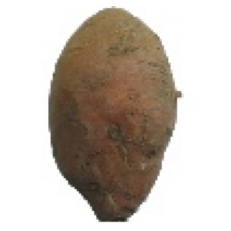

1/1 [==============================] - 0s 279ms/step

Acertou: Sim
Fruta selecionada - Potato Sweet
Fruta predita - Potato Sweet
____________________________________________________________
Fruta - 2



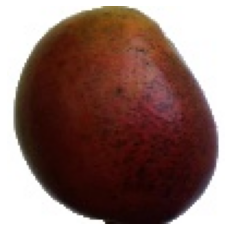

1/1 [==============================] - 0s 51ms/step

Acertou: Sim
Fruta selecionada - Mango Red
Fruta predita - Mango Red
____________________________________________________________
Fruta - 3



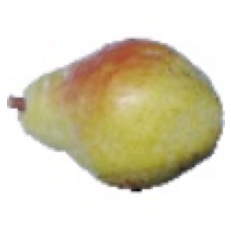

1/1 [==============================] - 0s 41ms/step

Acertou: Não
Fruta selecionada - Pear Williams
Fruta predita - Pepino
____________________________________________________________
Fruta - 4



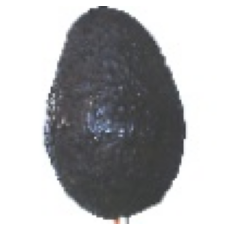

1/1 [==============================] - 0s 51ms/step

Acertou: Sim
Fruta selecionada - Avocado ripe
Fruta predita - Avocado ripe
____________________________________________________________
Fruta - 5



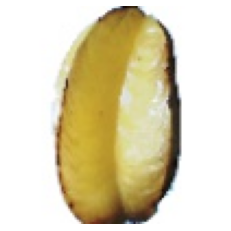

1/1 [==============================] - 0s 36ms/step

Acertou: Sim
Fruta selecionada - Carambula
Fruta predita - Carambula
____________________________________________________________
Fruta - 6



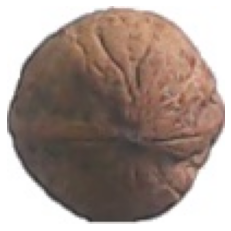

1/1 [==============================] - 0s 39ms/step

Acertou: Sim
Fruta selecionada - Walnut
Fruta predita - Walnut
____________________________________________________________
Fruta - 7



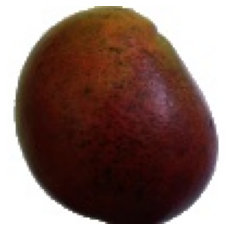

1/1 [==============================] - 0s 42ms/step

Acertou: Sim
Fruta selecionada - Mango Red
Fruta predita - Mango Red
____________________________________________________________
Fruta - 8



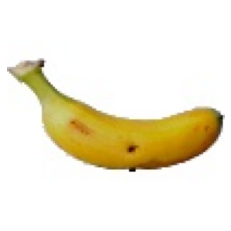

1/1 [==============================] - 0s 43ms/step

Acertou: Sim
Fruta selecionada - Banana Lady Finger
Fruta predita - Banana Lady Finger
____________________________________________________________
Fruta - 9



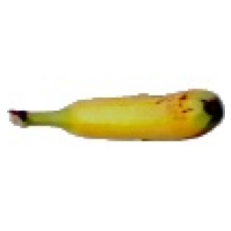

1/1 [==============================] - 0s 31ms/step

Acertou: Sim
Fruta selecionada - Banana Lady Finger
Fruta predita - Banana Lady Finger
____________________________________________________________
Fruta - 10



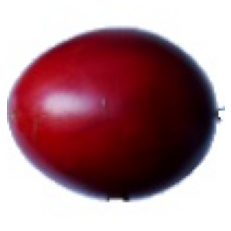

1/1 [==============================] - 0s 38ms/step

Acertou: Sim
Fruta selecionada - Tamarillo
Fruta predita - Tamarillo
____________________________________________________________
Fruta - 11



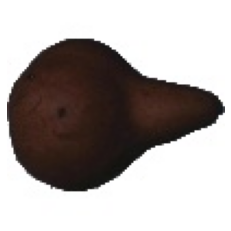

1/1 [==============================] - 0s 39ms/step

Acertou: Sim
Fruta selecionada - Pear Kaiser
Fruta predita - Pear Kaiser
____________________________________________________________
Fruta - 12



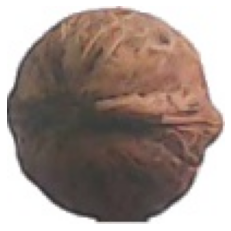

1/1 [==============================] - 0s 48ms/step

Acertou: Sim
Fruta selecionada - Walnut
Fruta predita - Walnut
____________________________________________________________
Fruta - 13



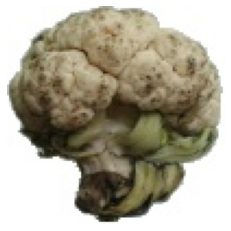

1/1 [==============================] - 0s 48ms/step

Acertou: Sim
Fruta selecionada - Cauliflower
Fruta predita - Cauliflower
____________________________________________________________
Fruta - 14



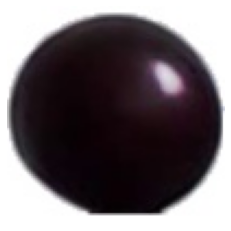

1/1 [==============================] - 0s 52ms/step

Acertou: Sim
Fruta selecionada - Cherry Wax Black
Fruta predita - Cherry Wax Black
____________________________________________________________
Fruta - 15



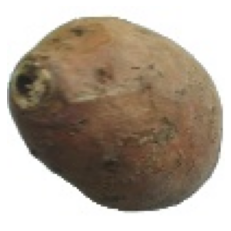

1/1 [==============================] - 0s 41ms/step

Acertou: Sim
Fruta selecionada - Potato Sweet
Fruta predita - Potato Sweet
____________________________________________________________
Fruta - 16



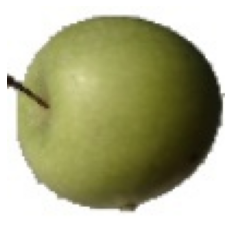

1/1 [==============================] - 0s 41ms/step

Acertou: Sim
Fruta selecionada - Apple Granny Smith
Fruta predita - Apple Granny Smith
____________________________________________________________
Fruta - 17



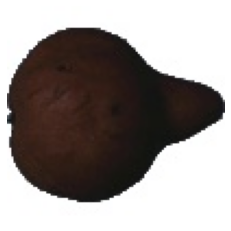

1/1 [==============================] - 0s 60ms/step

Acertou: Sim
Fruta selecionada - Pear Kaiser
Fruta predita - Pear Kaiser
____________________________________________________________
Fruta - 18



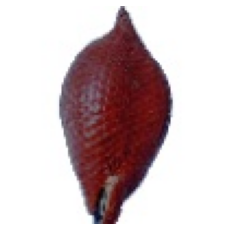

1/1 [==============================] - 0s 40ms/step

Acertou: Sim
Fruta selecionada - Salak
Fruta predita - Salak
____________________________________________________________
Fruta - 19



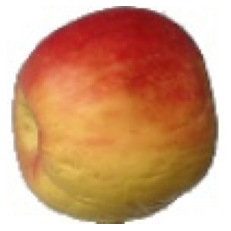

1/1 [==============================] - 0s 35ms/step

Acertou: Sim
Fruta selecionada - Apple Red Yellow 1
Fruta predita - Apple Red Yellow 1
____________________________________________________________
Fruta - 20



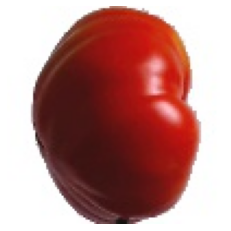

1/1 [==============================] - 0s 36ms/step

Acertou: Sim
Fruta selecionada - Tomato 3
Fruta predita - Tomato 3
____________________________________________________________


In [21]:
def print_fruit(caminho):
    image = cv2.imread(caminho)
    
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
caminho = 'datasets/fruits/fruits-360_dataset/fruits-360/Test'
classes = [arq for arq in listdir(caminho)]

contagem = 1

for classe in random.choices(classes, k=20):
    print(f"Fruta - {contagem}")
    
    frutas_imagens = [arq for arq in listdir(f"{caminho}/{classe}")]

    imagem_fruta = random.choice(frutas_imagens)
    print()
    caminho_imagem = f"{caminho}/{classe}/{imagem_fruta}"
    
    print_fruit(caminho_imagem)
    
    img = load_img(caminho_imagem , color_mode = "rgb", target_size=(100, 100))

    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    y_pred = fruit_best_model.predict(x)

    res = np.argmax(y_pred)
    fruta_predita = next(k for k, v in test_generator.class_indices.items() if v == res)
    
    print()
    print(f"Acertou: {'Sim' if classe == fruta_predita else 'Não'}")
    print(f"Fruta selecionada - {classe}")
    print(f"Fruta predita - {fruta_predita}")
    print(60 * '_')
    
    contagem += 1